# CNN

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
sess = tf.InteractiveSession()

image = np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype = np.float32)

C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [7]:
print(image.shape)

(1, 3, 3, 1)


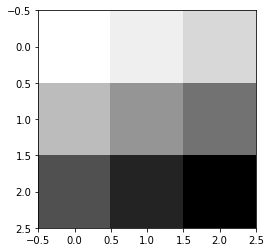

In [9]:
plt.imshow(image.reshape(3,3), cmap = 'Greys')

In [10]:
 print('image.shape', image.shape)

image.shape (1, 3, 3, 1)


In [13]:
weight = np.array([[[[[1.]],[[1.]]],
                 [[[1.]],[[1.]]]])

In [15]:
# print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])

image.shape (1, 3, 3, 1)


In [16]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')

In [19]:
conv2d_img = conv2d.eval()

In [21]:
conv2d_img

array([[[[12.],
         [16.]],

        [[24.],
         [28.]]]], dtype=float32)

[[12. 16.]
 [24. 28.]]


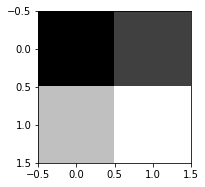

In [20]:
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

# Simple convolution layer

In [22]:
print("image shape", image.shape)

image shape (1, 3, 3, 1)


In [23]:
print("weight shape", weight.shape)

weight shape (2, 2, 1, 1)


In [24]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()

In [25]:
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 3, 3, 1)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


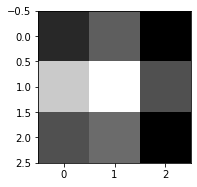

In [26]:
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

# 3 filters

In [27]:
print("image shape", image.shape)

image shape (1, 3, 3, 1)


In [29]:
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])

In [30]:
print("weight shape", weight.shape)

weight shape (2, 2, 1, 3)


In [31]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()

In [32]:
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 3, 3, 3)


In [34]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


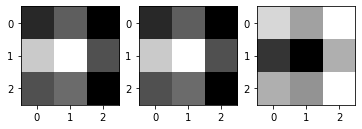

In [36]:
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

# Max Pooling

In [37]:
image = np.array([[[[4],[3]],[[2],[1]]]], dtype=np.float32)

In [38]:
pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1], padding='VALID')

In [39]:
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[4.]]]]


# SAME: Zero paddings

In [40]:
image = np.array([[[[4],[3]],[[2],[1]]]], dtype=np.float32)

In [41]:
pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1], padding='SAME')

In [42]:
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


# MNIST

In [43]:
from tensorflow.examples.tutorials.mnist import input_datat_data

In [44]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

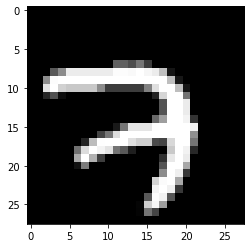

In [51]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

In [52]:
sess = tf.InteractiveSession()

C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [53]:
img = img.reshape(-1, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME')
print(conv2d)

Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


In [54]:
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

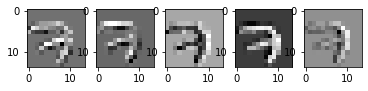

In [56]:
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

# MNIST Max Pooling

In [57]:
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [58]:
print(pool)

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


In [59]:
sess.run(tf.global_variables_initializer())

In [60]:
pool_img = pool.eval()

In [61]:
pool_img = np.swapaxes(pool_img, 0, 3)

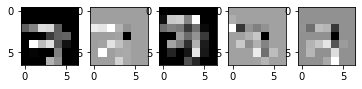

In [64]:
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap='gray')